## 1. Importing libraries and data

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier


In [59]:
df_answers = pd.read_csv(r'C:\Users\casbacar\Documents\Study\Specialization\Supervised marchine learning\Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')
df_temp = pd.read_csv(r'C:\Users\casbacar\Documents\Study\Specialization\Data Sets\dataset_scaled_temp.csv')
df_unscaled = pd.read_csv(r'C:\Users\casbacar\Documents\Study\Specialization\Data Sets\Dataset-weather-prediction-dataset-processed.csv')

In [24]:
df_temp.head()

,Unnamed: 0,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,...,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
0,11323,1991-01-01,1,-0.773075,-0.631005,-1.028583,-0.826356,-0.871621,-0.953178,-0.787848,...,-0.813810,-0.817231,-1.230904,-0.781005,-1.302981,-0.808980,-0.928711,-1.299234,-0.837763,-0.878510
1,11324,1991-01-02,1,-0.678010,-1.119018,-0.910949,0.012222,0.100337,-0.799717,-0.665550,...,-1.213407,-0.082081,-1.473528,-0.466820,-0.635564,-1.398318,-0.826335,-0.689646,-0.320071,-0.638173
2,11325,1991-01-03,1,-0.026139,-0.812591,-0.675681,-0.320045,-0.312009,-0.428855,-0.595665,...,-0.486867,-0.277121,-1.527444,-0.026962,-0.890396,-1.263612,0.095046,-0.478156,-0.288696,-1.569480
3,11326,1991-01-04,1,-0.610107,-0.778544,-0.946239,-0.668134,-0.577088,-0.774141,-0.945090,...,-0.281014,-0.637194,-1.311779,-0.416551,-0.647699,-0.775304,-0.138956,-0.726968,-0.790700,-1.329143
4,11327,1991-01-05,1,-0.637268,-0.801242,-0.805078,-0.731423,-0.606541,-0.748564,-0.875205,...,-1.031772,-0.787225,-1.392653,-0.781005,-0.429272,-1.027877,-0.914086,-0.478156,-0.853451,-1.539438


In [11]:
df_answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
df_unscaled.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [67]:
df_unsc = df_unscaled[df_unscaled['DATE'].astype(str).str.contains('1991')]

In [93]:
df_unsc_red = df_unsc[['BASEL_temp_mean', 'BELGRADE_temp_mean',
       'BUDAPEST_temp_mean', 'DEBILT_temp_mean', 'DUSSELDORF_temp_mean', 'HEATHROW_temp_mean', 'KASSEL_temp_mean',
       'LJUBLJANA_temp_mean', 'MAASTRICHT_temp_mean', 'MADRID_temp_mean',
       'MUNCHENB_temp_mean', 'OSLO_temp_mean',
       'SONNBLICK_temp_mean', 'STOCKHOLM_temp_mean',
       'VALENTIA_temp_mean']]

In [94]:
df_unsc_red.shape

(365, 15)

In [69]:
# We also filterd by 1991 for the pleasant weather dataset

df_answers_1991 = df_answers[df_answers['DATE'].astype(str).str.contains('1991')] #<-----INSERT YEAR HERE


In [30]:
df_answers_1991.shape

(365, 16)

In [76]:
# Dropping the Date and Month columns

df_answers_1991.drop(['DATE'],axis=1, inplace = True)

C:\Users\casbacar\AppData\Local\Temp\ipykernel_11180\2632593642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_answers_1991.drop(['DATE'],axis=1, inplace = True)


In [77]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df_unsc_red
y = df_answers_1991

In [78]:
print(X.shape)
print(y.shape)

(365, 15)
(365, 15)


In [79]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [80]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(273, 15)
(92, 15)
(273, 15)
(92, 15)


In [88]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,5)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [1 2 3 4]
i - 1
k - [1 2 3 4]
i - 2
k - [1 2 3 4]
i - 3
k - [1 2 3 4]


C:\Users\casbacar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


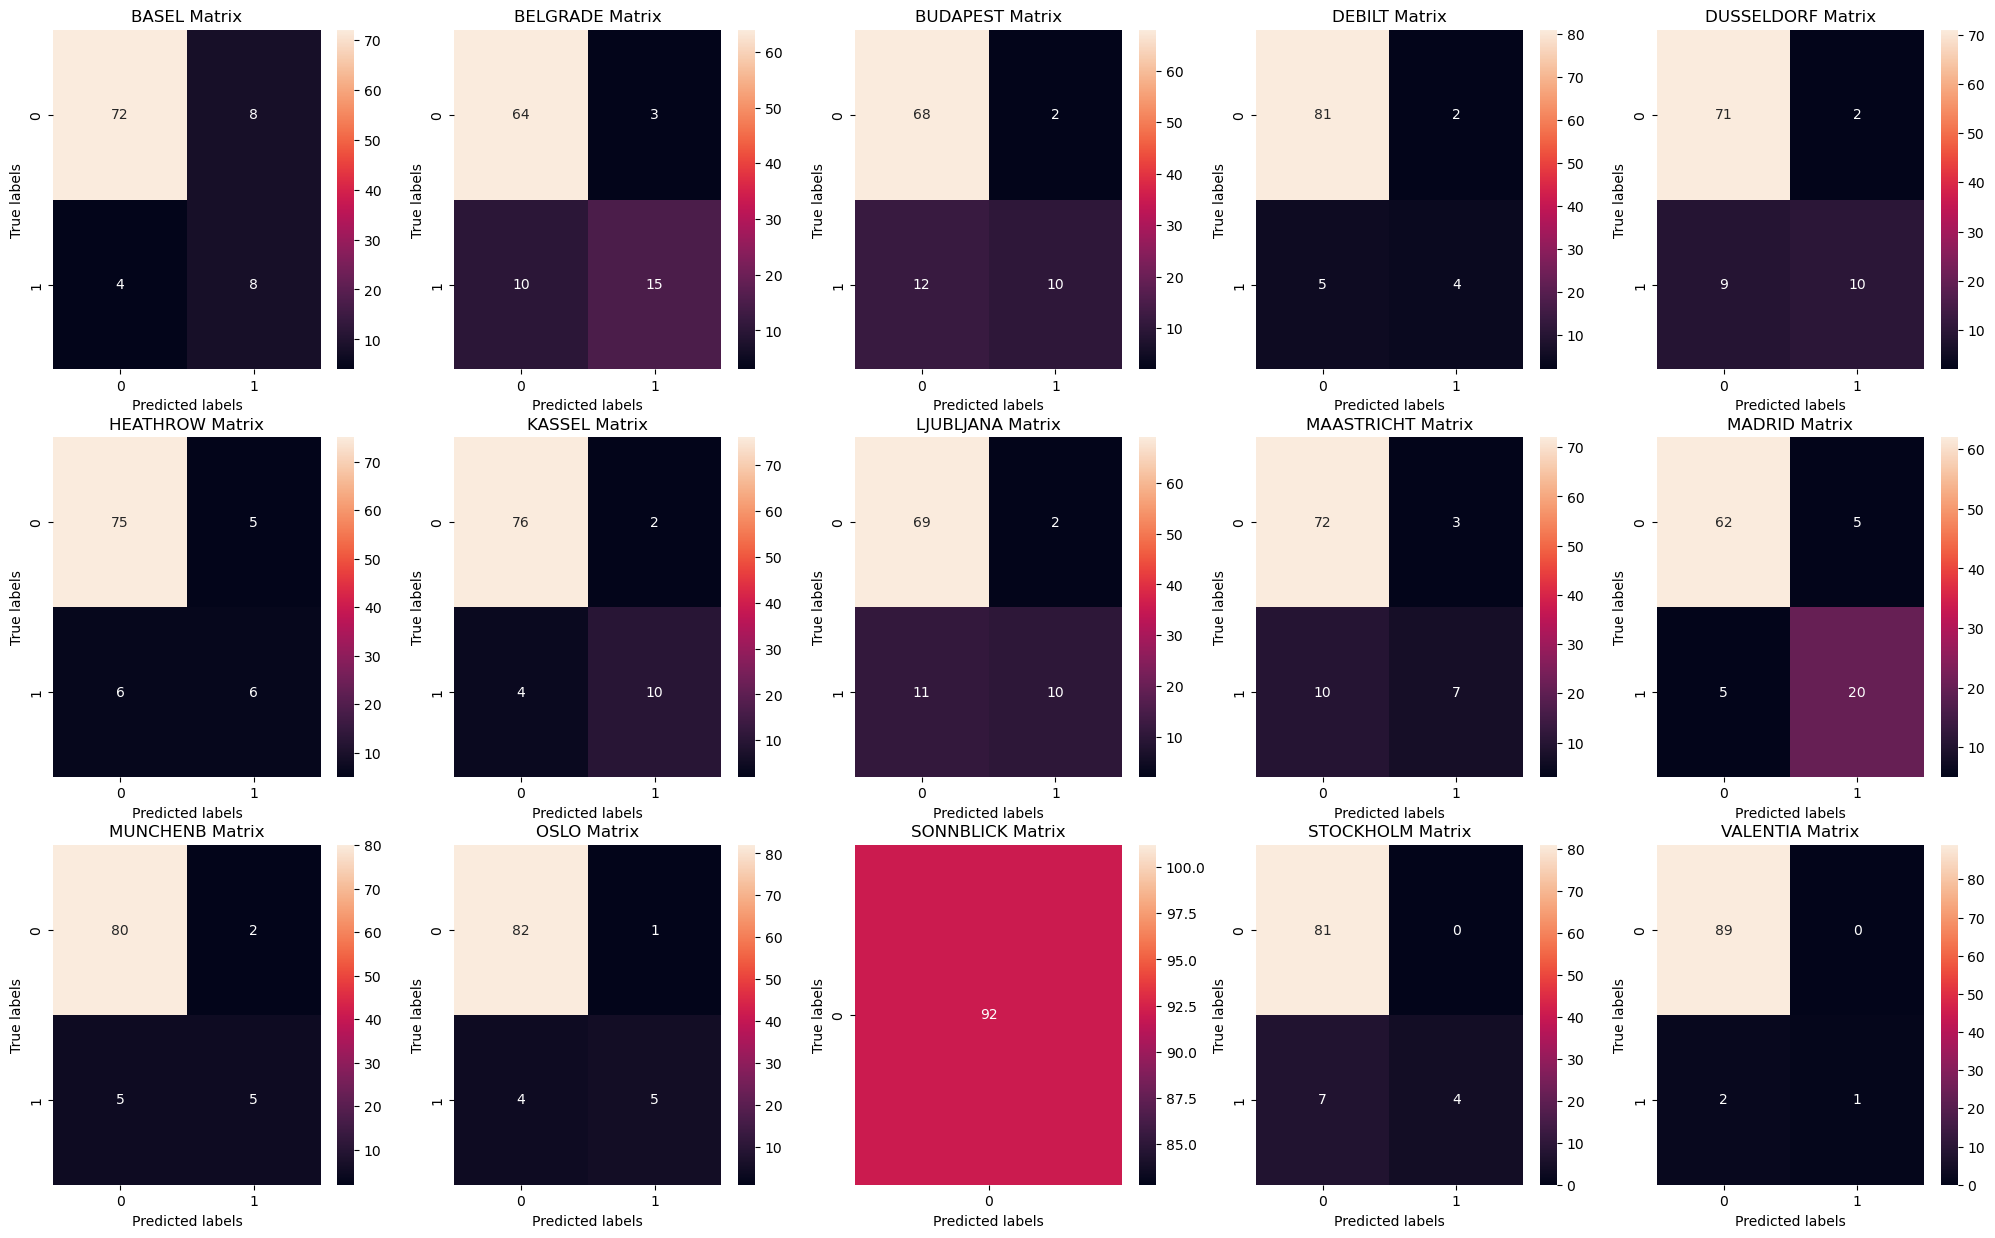

In [89]:
locations = list({x.split("_")[0] for x in df_unsc_red.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

<function matplotlib.pyplot.show(close=None, block=None)>

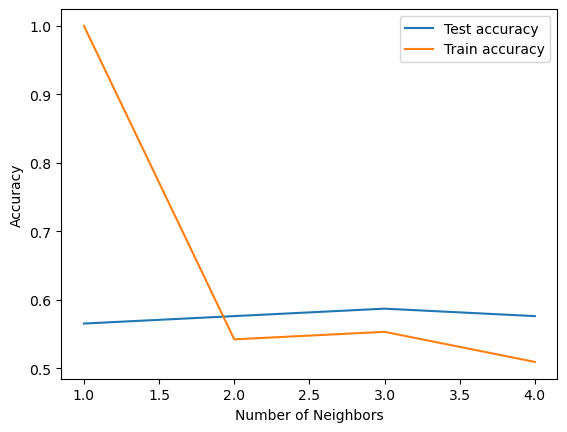

In [90]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show